### Homework 2: Visualization of weather check database

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 

In [4]:
df_weather = pd.read_csv("weather-check.csv")
df_weather.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [5]:
df_weather.rename(columns={
    "If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?": "apple_watch_check"
}, inplace=True)

In [21]:
df_weather = df_weather[df_weather["Age"] != "-"]

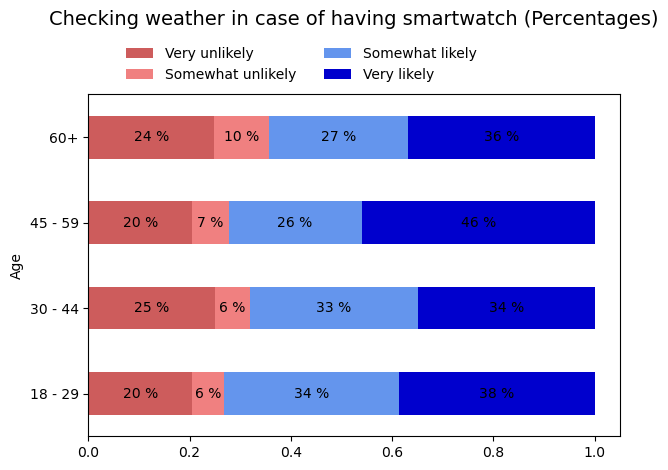

In [100]:
x_var, y_var = "Age", "apple_watch_check"
df_grouped = df_weather.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)

desired_order = ["Very unlikely", "Somewhat unlikely", "Somewhat likely", "Very likely"]

df_grouped = df_grouped[desired_order]

custom_colors = ["indianred", "lightcoral", "cornflowerblue", "mediumblue"]  # Change these to your preferred colors

df_grouped.plot.barh(stacked=True, color = custom_colors)

plt.title("Checking weather in case of having smartwatch (Percentages)",fontsize=14, pad=50)

plt.legend(
    bbox_to_anchor=(0.4, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2,
)

for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        plt.text(
            cumulative + element / 2,
            ix,
            f"{int(element * 100)} %",
            va="center",
            ha="center",
        )
        cumulative += element


plt.tight_layout()
plt.show()

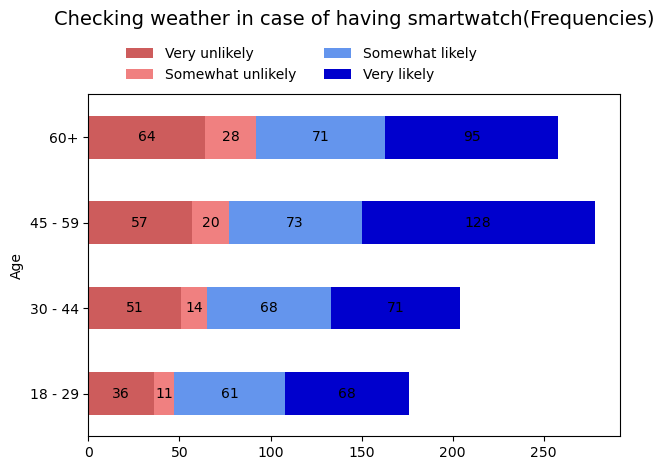

In [94]:
x_var, y_var = "Age", "apple_watch_check"
df_grouped = df_weather.groupby(x_var)[y_var].value_counts().unstack(y_var)
desired_order = ["Very unlikely", "Somewhat unlikely", "Somewhat likely", "Very likely"]
df_grouped = df_grouped[desired_order]

custom_colors = ["indianred", "lightcoral", "cornflowerblue", "mediumblue"]

df_grouped.plot.barh(stacked=True, color=custom_colors)

plt.title("Checking weather in case of having smartwatch(Frequencies)", fontsize=14, pad=50)

plt.legend(
    bbox_to_anchor=(0.4, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2,
)

for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        plt.text(
            cumulative + element / 2,
            ix,
            f"{int(element)}", 
            va="center",
            ha="center",
            fontsize=10,
            color="black" 
        )
        cumulative += element

plt.tight_layout()
plt.show()